<a href="https://colab.research.google.com/github/AnnyshkaF/High-Performance-Lab/blob/main/task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Text(0, 0.5, 'signal, arb.units')

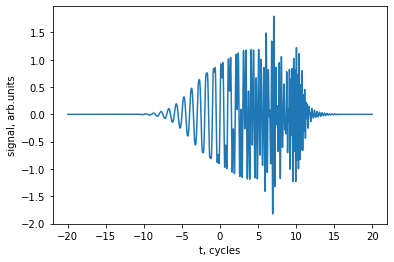

In [ ]:
# generate the signal
nofts=1000
t=np.linspace(-20*2*pi, 20*2*pi, 2**14+5)
t=np.linspace(-20*2*pi, 20*2*pi, 3**9+6)
y=np.sin(t)*exp(-t**2/2/20**2)
y=y+np.sin(3*t)*exp(-(t-5*2*pi)**2/2/20**2)
y=y+np.sin(5.5*t)*exp(-(t-10*2*pi)**2/2/5**2)
y=y+np.sin(4*t)*exp(-(t-7*2*pi)**2/2/5**2)

plt.plot(t/2/pi,y)

xlabel('t, cycles')
ylabel('signal, arb.units')

Text(0, 0.5, 'Power spectrum, arb. units')

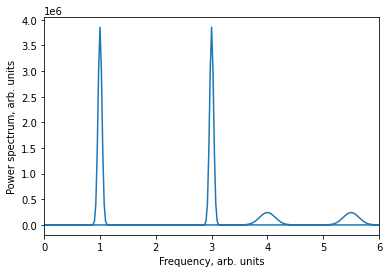

In [ ]:
# Fourier spectrum
sp=fft.fft(y)
w=fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
plot(w, abs(sp)**2)
xlim(0,6)
xlabel('Frequency, arb. units')
ylabel('Power spectrum, arb. units')

(0.0, 10.0)

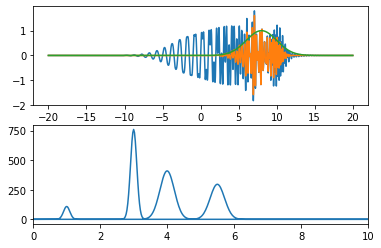

In [ ]:
# windowed Fourier transform (Gabor transform, spectrogram)

window_width=2.0*2*pi
window_position=8*2*pi
window_function=exp(-(t-window_position)**2/2/window_width**2)

y_window=y * window_function

subplot(211)
plot(t/2/pi, y)
plot(t/2/pi, y_window)
plot(t/2/pi, window_function)

sp = fft.fft(y_window)
w=fft.fftfreq(len(y), d=(t[1]-t[0])/2/pi)
subplot(212)
plot(w, abs(sp))
xlim(0, 10)
# now do the same for different window positions and plot 2D graph
# x_axis is window position
# y_axis is frequency
# color axis represents the power spectrum

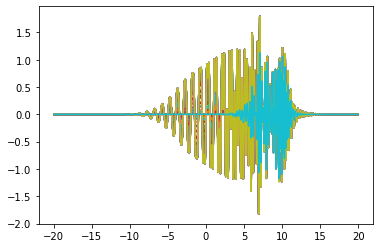

In [ ]:
for i in range(-10,10,1):
  window_width=2.0*2*pi
  window_position=i*2*pi
  window_function=exp(-(t-window_position)**2/2/window_width**2)

  y_window=y * window_function

  plot(t/2/pi, y)
  plot(t/2/pi, y_window)

In [ ]:
def get_specgram(nwindowsteps=10000):
  t_window = linspace(-20*2*pi, 20*2*pi, nwindowsteps)
  window_width=2.0*2*pi
  specgram = np.empty([len(t), len(t_window)])
  
  for n, t_w in enumerate(t_window):
    window_position = t_w
    window_function = exp(-(t-window_position)**2/2/window_width**2)
    y_window = y * window_function
    #plot(y_window)
    specgram[:,n] = abs(fft.fft(y_window))
  
  return specgram

In [ ]:
# plot spectrogram, explain what you see
s = get_specgram(1000)

(0.0, 300.0)

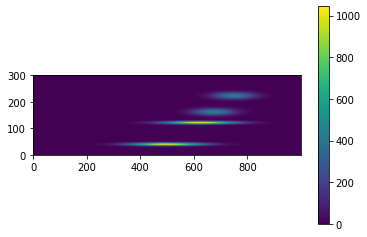

In [ ]:
imshow(s) #, aspect='auto', origin='lower', extent=[min(t)/2/pi, max(t)/2/pi, w[0], 2*w[int(len(w)/2/100)]])
colorbar()
ylim(0, 300)
#xlabel('Time, cycles')
#ylabel('Frequency')


19689

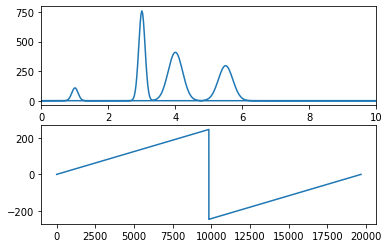

In [ ]:
#a = get_specgram(1000)
#print(a.shape)
subplot(211)
plot(w, abs(sp))
xlim(0, 10)
subplot(212)
plot(w)
len(w)

492.17500126957543


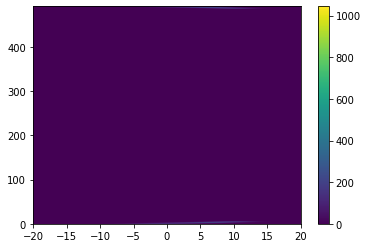

In [ ]:
print(2*w[int(len(w)/2)])
imshow(s, aspect='auto', origin='lower', extent=[min(t)/2/pi, max(t)/2/pi, w[0], 2*w[int(len(t)/2)-1]])
colorbar()
#ylim(0, 300)
#xlabel('Time, cycles')
#ylabel('Frequency')

In [ ]:
w[7000]

174.99111178824808